# <div style="display:fill;border-radius:5px;background-color:#676F9F;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:#F1EFF5;overflow:hidden;margin:0;font-size:150%;font-style: Helvetica;text-align:center"><b></b>WHAT IF DOCTOR🧑‍⚕️ PREPARES AN AI MODEL??🤔</p></div>

In the previous notebook, we have explored the dataset and now we are ready to prepare an AI model out of it. 
<b><u><i>"THE_FUEL_IS_READY_AND_HENCE_LETS_MAKE_AN_ENGINE...."<i/><u/><b/>

In [6]:
import pandas as pd                       # library for data manipulation (data cleaning,analysing...)
import numpy as np                        # library for numerical computation
import matplotlib.pyplot as plt           # library for data visualization which is built on NumPy arrays
%matplotlib inline
import seaborn as sns                     # library for data visualization built on top of matplotlib and 
                                          # closely integrated with pandas data structures in Python.


import warnings                           # to avoid warning flash
warnings.filterwarnings('ignore')

# Other libraries will be imported in the following steps as the process moves.... 

In [2]:
#Load the dataset which we have created previously......
df = pd.read_csv(r'D:\DSF\PROJECTPRO\MEDICAL_PROJECTS\1. DIABETES_MELLITUS\created_diabetes.csv')

## <font color='#4287f5'> TRAIN/TEST DATA PREPARATION....</font>

Before preparing train and test data,

### <font color='#4287f5'> Lets select the features now....</font>

For that, lets plot <u>**Pearson's Correlation Coefficient**</u>....
<br></br>
What does this coefficient signify?
* It is a measure of the strength of a linear association between two variables.
* It gives the measure of the strength of association between two variables.
* It takes a range of values from +1 to -1.
* A **value of 0** indicates that there is **no association** between the two variables. 
* A **value greater than 0** indicates a **positive association**; that is, as the value of one variable increases, so does the value of the other variable. 
* A **value less than 0** indicates a **negative association**; that is, as the value of one variable increases, the value of the other variable decreases.

In [3]:
corr_matrix=df.corr()

In [4]:
import seaborn as sns

<AxesSubplot:>

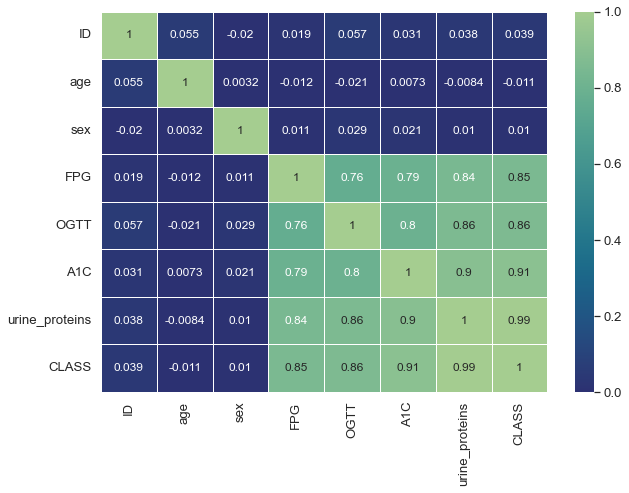

In [7]:
plt.figure(figsize=(10,7))       # Size of whole plot

sns.set(font_scale= 1.2)         # Font size of labels 

sns.heatmap(corr_matrix, annot=True, cmap='crest_r',vmin=0, vmax=1, linewidths=.5, annot_kws={"size": 12})

Here we can see that,
* urine_proteins(0.99), A1C(0.91), OGTT(0.86) and FPG(0.85) are the most correlated(high p-values) features with Outcome CLASS.
* ID,Age and Sex are the least correlated, hence they don't contribute much to the model so we can drop them.

We can rank these features by another method named **'F-test'**.

* The F Test Formula is a Statistical Formula used to test the significance of differences between two groups of Data. It is often used in research studies to determine whether the difference in the means of two populations is Statistically significant.
                                        OR
* F test is a statistical test that is used in hypothesis testing to check whether the variances of two populations or two samples are equal or not
* In simple terms, lets say F-test value of a feature 'Glucose' is 0.5, it means that the model uses 0.5 amount of a feature value in determining its prediction.

In [8]:
target_name='CLASS'

y= df[target_name]              

X=df.drop(target_name,axis=1)   # dropping the Outcome column and keeping all other columns as X to be the features for the model

In [9]:
from sklearn.feature_selection import f_classif

In [10]:
[f_stat, f_p_value] = f_classif(X,y)

In [11]:
f_test_df = pd.DataFrame({'Feature': df.columns[:7] , 
                          'f_statistic': f_stat,
                          'p value':f_p_value})

In [12]:
f_test_df.sort_values('p value')

,Feature,f_statistic,p value
5,A1C,2317.709883,0.000000e+00
6,urine_proteins,41783.638512,0.000000e+00
4,OGTT,1603.861864,2.608613e-312
3,FPG,1434.960753,3.531069e-294
0,ID,1.315961,2.686820e-01
2,sex,0.564620,5.687581e-01
1,age,0.153834,8.574346e-01


As we can see here, as mentioned earlier,
* A1C,urine_proteins,OGTT,FPG are most correlated and 
* ID,sex,age are least correlated.
So, lets drop the least correlated features. And factually, this makes sense because to diagnose a patient to be a diabetic, age, sex and other such features are least bothered.

In [ ]:
# df_selected=df.drop(['ID','sex','age'],axis='columns')

Here, I want to make clear that I am not dropping the least correlated features as the number of features present in this dataset is small and I also want to check whether AI algorithms will choose such features for its prediction. 

## <font color='#4287f5'>Split the Data Frame into X and y...</font>

In [13]:
target_name='CLASS'

y= df[target_name]              

X=df.drop(target_name,axis=1)   # dropping the Outcome column and keeping all other columns as X to be the features for the model

In [14]:
X.head()    # contains only the features we had selected

,ID,age,sex,FPG,OGTT,A1C,urine_proteins
0,0,56,0,170,319,7.43,2
1,1,61,1,91,109,5.25,0
2,2,55,0,167,259,7.76,2
3,3,61,1,203,329,6.93,2
4,4,28,1,210,280,7.63,2


In [15]:
y.head()  # contains only the 'Outcome' feature.

0    2
1    0
2    2
3    2
4    2
Name: CLASS, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


# Classification Algorithms

- Naive Bayes
- KNN
- SVM
- Decision Tree
- Random Forest
- Logistic Regression

### The models include the following:-

#### a. Hyper Parameter Tuning using GridSearch CV

**1. What Is Hyperparameter Tuning?**

Hyperparameters are the variables that the user specify usually while building the Machine Learning model. thus, hyperparameters are specified before specifying the parameters or we can say that hyperparameters are used to evaluate optimal parameters of the model. the best part about hyperparameters is that their values are decided by the user who is building the model. For example, max_depth in Random Forest Algorithms, k in KNN Classifier.
Hyperparameter tuning is the process of tuning the parameters present as the tuples while we build machine learning models. 

**2. What is GridSearch ?**

Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters.

**3. What Steps To Follow For Hyper Parameter Tuning?**

1. Select the type of model we want to use like RandomForestClassifier, regressor or any other model
2. Check what are the parameters of the model
3. Select the methods for searching the hyperparameter
4. Select the cross-validation approach
5. Evaluate the model using the score

#### b. Fit Best Model

#### c. Predict on testing data using that model

#### d. Performance Metrics :- Confusion Matrix, F1 Score, Precision Score, Recall Score
**Confusion Matrix**
It is a tabular visualization of the model predictions versus the ground-truth labels. 

**F1 Score :-**
It’s the harmonic mean between precision and recall. 

**Precision Score**
Precision is the fraction of predicted positives/negatives events that are actually positive/negatives.

**Recall Score**
It is the fraction of positives/negative events that you predicted correctly. 

In [17]:
##################################################################################################################
####################################         IMPORT_DIFFERENT_MODELS_CLASS     ###################################
##################################################################################################################

from sklearn.linear_model      import LogisticRegression

from sklearn.neighbors         import KNeighborsClassifier

from sklearn.naive_bayes       import GaussianNB

from sklearn.svm               import SVC

from sklearn.tree              import DecisionTreeClassifier
from sklearn.ensemble          import RandomForestClassifier

from keras.models              import Sequential
from keras.layers              import Dense


##################################################################################################################
####################################         IMPORT_MODEL_SELECTION_CLASS    #####################################
##################################################################################################################



from sklearn.model_selection   import RepeatedStratifiedKFold
from sklearn.model_selection   import GridSearchCV


##################################################################################################################
####################################         IMPORT_STATISTICS_METHODS    ########################################
##################################################################################################################


from sklearn.metrics           import classification_report,confusion_matrix
from sklearn.metrics           import f1_score, precision_score, recall_score



Best leaf_size: 30
Best p: 1
Best n_neighbors: 15
Classification Report is:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93        45
           1       0.84      0.87      0.86        31
           2       1.00      0.98      0.99       124

    accuracy                           0.95       200
   macro avg       0.92      0.93      0.93       200
weighted avg       0.96      0.95      0.96       200


 F1:
 0.9265601892931086

 Precision score is:
 0.9195478723404255

 Recall score is:
 0.9341099163679809

 Confusion Matrix:



<AxesSubplot:>

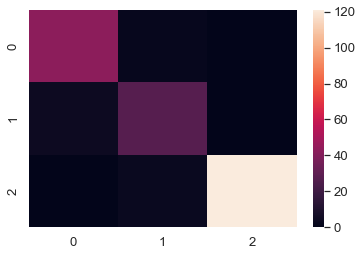

In [18]:
##################################################################################################################
#####################################    K-NEIGHBORS_CLASSIFIER_MODEL   ##########################################
##################################################################################################################


# from sklearn.neighbors  import KNeighborsClassifier

# List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

# Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Train the model
best_model = grid_search.fit(X_train,y_train)

# Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

# Test the model
knn_pred = best_model.predict(X_test)

# Evaluate the model
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred,average='macro'))
print("\n Precision score is:\n",precision_score(y_test,knn_pred,average='macro'))
print("\n Recall score is:\n",recall_score(y_test,knn_pred,average='macro'))
print("\n Confusion Matrix:\n")

sns.heatmap(confusion_matrix(y_test,knn_pred))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Classification Report is:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95        45
           1       0.93      0.90      0.92        31
           2       1.00      1.00      1.00       124

    accuracy                           0.97       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.97      0.97      0.97       200


 F1:
 0.9543625773133969

 Precision score is:
 0.9560386473429952

 Recall score is:
 0.9529271206690563

 Confusion Matrix:



<AxesSubplot:>

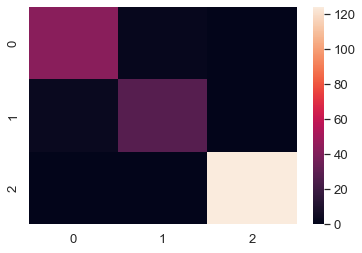

In [19]:
##################################################################################################################
############################    GAUSSIAN_NAIVE_BAYES_CLASSIFIER_MODEL   ##########################################
##################################################################################################################

# from sklearn.naive_bayes import GaussianNB

# List Hyperparameters to tune
param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}

# Making the model
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

# Train the model
best_model= nbModel_grid.fit(X_train, y_train)

# Test the model
nb_pred=best_model.predict(X_test)

# Evaluate the model
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred,average='macro'))
print("\n Precision score is:\n",precision_score(y_test,nb_pred,average='macro'))
print("\n Recall score is:\n",recall_score(y_test,nb_pred,average='macro'))
print("\n Confusion Matrix:\n")

sns.heatmap(confusion_matrix(y_test,nb_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93        45
           1       0.93      0.87      0.90        31
           2       1.00      1.00      1.00       124

    accuracy                           0.97       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.97      0.97      0.97       200


 F1:
 0.9265601892931086

 Precision score is:
 0.9195478723404255

 Recall score is:
 0.9341099163679809

 Confusion Matrix:



<AxesSubplot:>

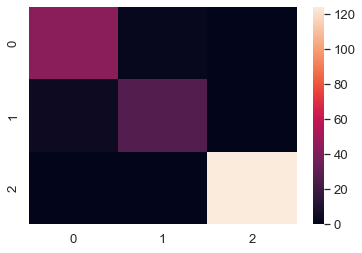

In [20]:
##################################################################################################################
######################################   SUPPORT_VECTOR_MACHINE_MODEL   ##########################################
##################################################################################################################

# from sklearn.svm import SVC

# List Hyperparameters to tune
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Train the model
grid_result = grid_search.fit(X, y)

# Test the model
svm_pred=grid_result.predict(X_test)

# Evaluate the model
print("Classification Report is:\n",classification_report(y_test,svm_pred))
print("\n F1:\n",f1_score(y_test,knn_pred,average='macro'))
print("\n Precision score is:\n",precision_score(y_test,knn_pred,average='macro'))
print("\n Recall score is:\n",recall_score(y_test,knn_pred,average='macro'))
print("\n Confusion Matrix:\n")

sns.heatmap(confusion_matrix(y_test,svm_pred))

Fitting 4 folds for each of 40 candidates, totalling 160 fits
Classification Report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00       124

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


 F1:
 1.0

 Precision score is:
 1.0

 Recall score is:
 1.0

 Confusion Matrix:



<AxesSubplot:>

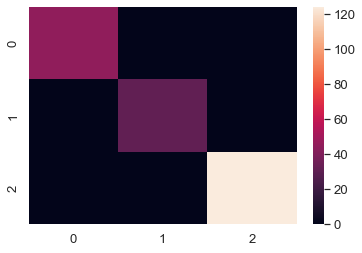

In [21]:
##################################################################################################################
#####################################  DECISION_TREE_CLASSIFIER_MODEL   ##########################################
##################################################################################################################

# from sklearn.tree import DecisionTreeClassifier

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

dt = DecisionTreeClassifier()
# Making the model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

# Train the model
best_model=grid_search.fit(X_train, y_train)

# Test the model
dt_pred=best_model.predict(X_test)

# Evaluate the model
print("Classification Report is:\n",classification_report(y_test,dt_pred))
print("\n F1:\n",f1_score(y_test,dt_pred,average='macro'))
print("\n Precision score is:\n",precision_score(y_test,dt_pred,average='macro'))
print("\n Recall score is:\n",recall_score(y_test,dt_pred,average='macro'))
print("\n Confusion Matrix:\n")

sns.heatmap(confusion_matrix(y_test,dt_pred))


No handles with labels found to put in legend.


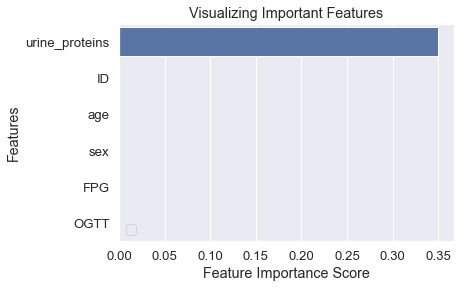

In [22]:
#Lets see the top features which has been selected by decision tree to classify
dt_model = DecisionTreeClassifier(random_state=0)
y_pred = dt_model.fit(X_train, y_train).predict(X_test)


# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, dt_model.feature_importances_])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]

feature_importance

import seaborn as sns
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

I am not at all impressed by the above plot because as a doctor, I never select urine_proteins to diagnose a patient diabetic or not. Lets not give our hope yet as we have still so many models to check.

Now, I drop the urine_proteins column and run the algorithm...

In [23]:
df1 = df.copy()

In [24]:
target_name='CLASS'

y1= df1[target_name]              

In [29]:
X1=df1.drop(target_name,axis=1)

In [34]:
X1.pop('urine_proteins')

0      2
1      0
2      2
3      2
4      2
      ..
995    2
996    0
997    2
998    0
999    2
Name: urine_proteins, Length: 1000, dtype: int64

In [35]:
X1.head()

,ID,age,sex,FPG,OGTT,A1C
0,0,56,0,170,319,7.43
1,1,61,1,91,109,5.25
2,2,55,0,167,259,7.76
3,3,61,1,203,329,6.93
4,4,28,1,210,280,7.63


In [36]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.2)

In [37]:
#Lets see the top features which has been selected by decision tree to classify, after removing urine_proteins column...
dt_model1 = DecisionTreeClassifier(random_state=0)
y1_pred = dt_model1.fit(X1_train, y1_train).predict(X1_test)

In [38]:
# Finding the variable with more importance
feature_importance1 = pd.DataFrame([X1_train.columns, dt_model1.feature_importances_])
feature_importance1 = feature_importance1.T.sort_values(by = 1, ascending=False)[1:10]

No handles with labels found to put in legend.


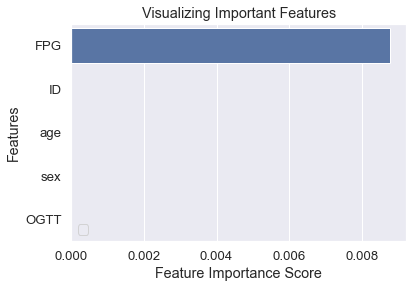

In [39]:
import seaborn as sns
sns.barplot(x=feature_importance1[1], y=feature_importance1[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [40]:
# Metrics Performance
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00       136

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Now,its choosing the right feature...

Classification Report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00       124

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


 F1:
 0.9265601892931086

 Precision score is:
 0.9195478723404255

 Recall score is:
 0.9341099163679809

 Confusion Matrix:



<AxesSubplot:>

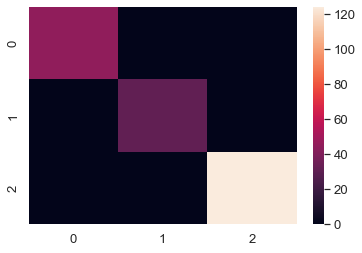

In [41]:
##################################################################################################################
#####################################  RANDOM_FOREST_CLASSIFIER_MODEL   ##########################################
##################################################################################################################

# from sklearn.ensemble import RandomForestClassifier

# define models and parameters
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']

# Making the model
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

# Train the model
best_model = grid_search.fit(X_train, y_train)

# Test the model
rf_pred=best_model.predict(X_test)

# Evaluate the model
print("Classification Report is:\n",classification_report(y_test,rf_pred))
print("\n F1:\n",f1_score(y_test,knn_pred,average='macro'))
print("\n Precision score is:\n",precision_score(y_test,knn_pred,average='macro'))
print("\n Recall score is:\n",recall_score(y_test,knn_pred,average='macro'))
print("\n Confusion Matrix:\n")

sns.heatmap(confusion_matrix(y_test,rf_pred))

No handles with labels found to put in legend.


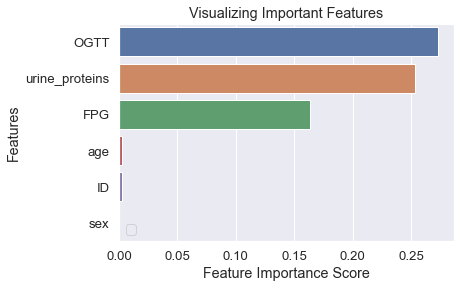

In [42]:
# #Lets see the top features which has been selected by random forest to classify
rf_model = RandomForestClassifier(random_state=1)
y_pred = rf_model.fit(X_train, y_train).predict(X_test)

# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, rf_model.feature_importances_])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]

import seaborn as sns
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
############################# AdaBoostClassifier ########################

In [43]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(random_state=0)
ada_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=0)

In [44]:
y_pred = ada_model.predict(X_test)

In [45]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00       124

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [46]:
# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, ada_model.feature_importances_])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]

No handles with labels found to put in legend.


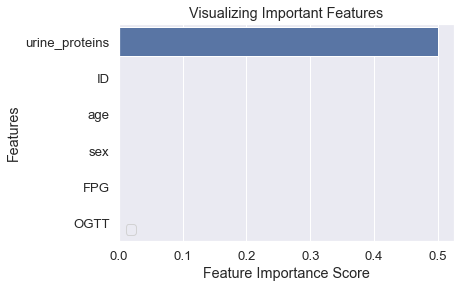

In [47]:
import seaborn as sns
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [48]:
############################ XGBClassifier ##########################

In [49]:
# xg Boost
from xgboost import XGBClassifier

In [50]:
xg_model = XGBClassifier(random_state=1)
xg_model.fit(X_train, y_train)

[10:43:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [51]:
y_pred = xg_model.predict(X_test)

In [52]:
from sklearn import metrics
metrics.f1_score(y_test,y_pred,average="macro")

1.0

In [53]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00       124

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [54]:
# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, xg_model.feature_importances_])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]

No handles with labels found to put in legend.


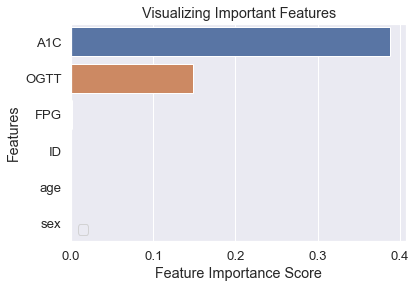

In [55]:
import seaborn as sns
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Yessss!!!!!!!!!!!! "XGB is the doctor now...it selected the right features to diagnose diabetes"

Lets check other models too...

In [60]:
##################################################################################################################
########################################  LOGISTIC_REGRESSION_MODEL   ############################################
##################################################################################################################

# from sklearn.linear_model import LogisticRegression

# Fit and train the model
reg = LogisticRegression()
reg.fit(X_train,y_train)

# Test the model
lr_pred=reg.predict(X_test)

# Evaluate the model
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred,average = 'macro'))
print("\n Precision score is:\n",precision_score(y_test,lr_pred,average = 'macro'))
print("\n Recall score is:\n",recall_score(y_test,lr_pred,average = 'macro'))
print("\n Confusion Matrix:\n")
                    
sns.heatmap(confusion_matrix(y_test,lr_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.91      0.94      0.92        31
           2       0.98      0.98      0.98       124

    accuracy                           0.97       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.97      0.97      0.97       200


 F1:
 0.9617351390638813

 Precision score is:
 0.9606854838709676

 Recall score is:
 0.9630227001194743

 Confusion Matrix:



<AxesSubplot:>

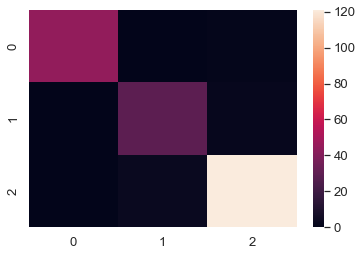

In [62]:
# Evaluate the model
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred,average = 'macro'))
print("\n Precision score is:\n",precision_score(y_test,lr_pred,average = 'macro'))
print("\n Recall score is:\n",recall_score(y_test,lr_pred,average = 'macro'))
print("\n Confusion Matrix:\n")
                    
sns.heatmap(confusion_matrix(y_test,lr_pred))

Of all the models, XGBoost performed the best. It classified with 100% accuracy by selecting the right features...

## Testing the model with an example...

Here is a 26 years old female patient with an ID of 5555 with diabetic profile showing Fasting Plasma Glucose value of 180 mg/dl, Oral Glucose Tolerance Test of 199 mg/dl with HbA1c value of 7% and proteins in urine is found to be present moderately. Clearly, the patient is diabetic as all the values are above the normal range. Lets see how the model performs...

In [67]:
P = {'ID':5555,'age': 26,'sex': 0,'FPG': 180, 'OGTT': 199, 'A1C': 7.0,'urine_proteins':1}
XX = pd.DataFrame(P,index=[0])

In [68]:
pred = rf_model.predict(XX)

In [69]:
pred

array([2], dtype=int64)

The model predicted accurately!!!